<font color='black' size='4' face='Tenor Sans'>

<font color='black' size='2' face='Tenor Sans'>

# CodePeak 2025 : Medical Insurance Cost Prediction #647
# MADE BY HARSHIT SETH
# EMAIL - harshitseth@hotmail.com
# GITHUB - https://github.com/HarshitSeth77
# LINKEDIN - https://www.linkedin.com/in/harshitseth77/

<a id="import-libraries"></a>
## 1)  Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


<a id="loading-files"></a>
## 2) Loading Files
<font color='black' size='2' face='Sans Serif'>

In [2]:
train = pd.read_csv('insurance.csv', dtype={'Column26': str})
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<a id="data-cleaning"></a>
## 3) Data Cleaning

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 3.1) Data Describe
<a id="data-describe"></a>


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<a id="missing-values"></a>
## 3.2)  Missing Values

In [5]:
total_missing_values = train.isnull().sum().sum()

if total_missing_values == 0:
    print("There are no missing values ")
else:
    print("Total missing values:", total_missing_values)

There are no missing values 


<a id="eda"></a>
## 4) EDA

## 4.1) Correlation Matrix
<a id="correlation-matrix"></a>


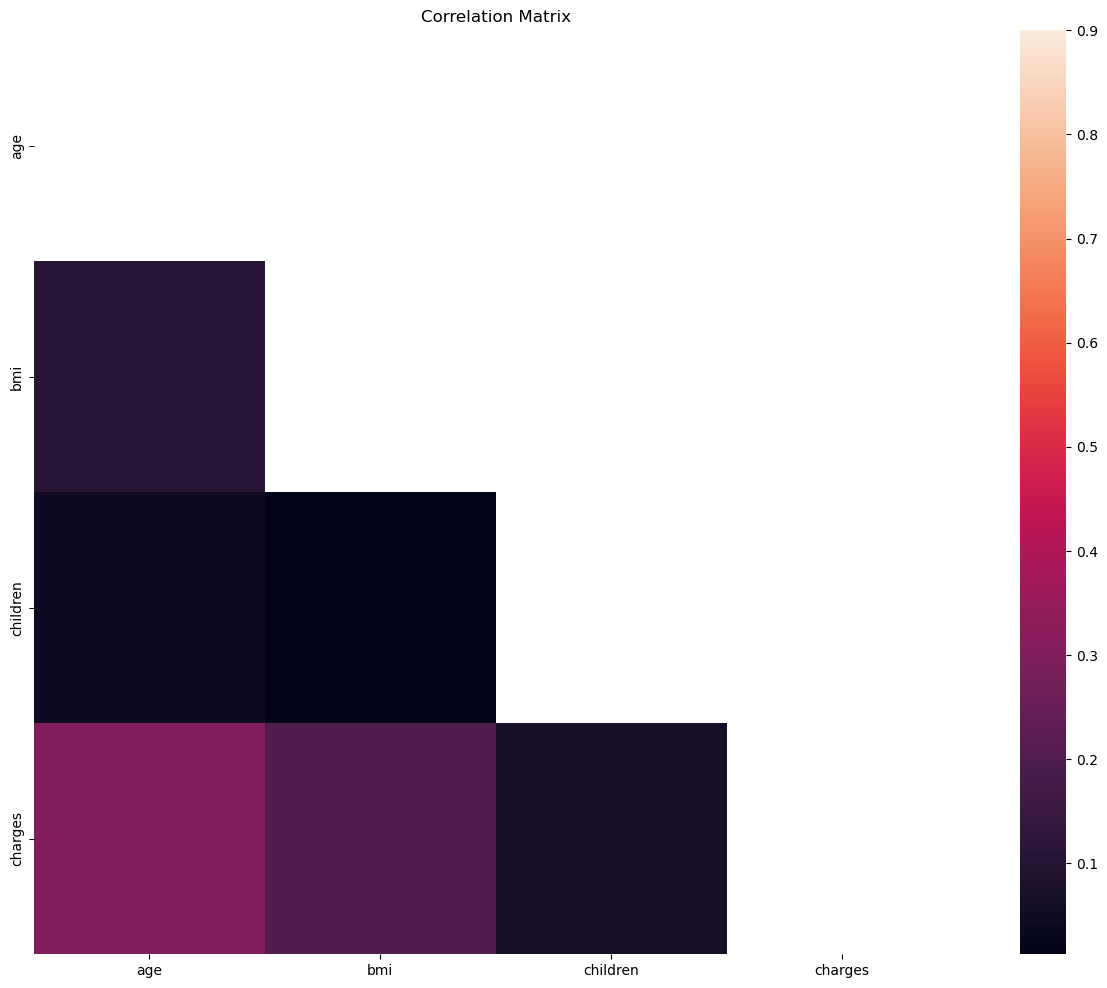

In [6]:
# Calculate Correlation Matrix
corr = train.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

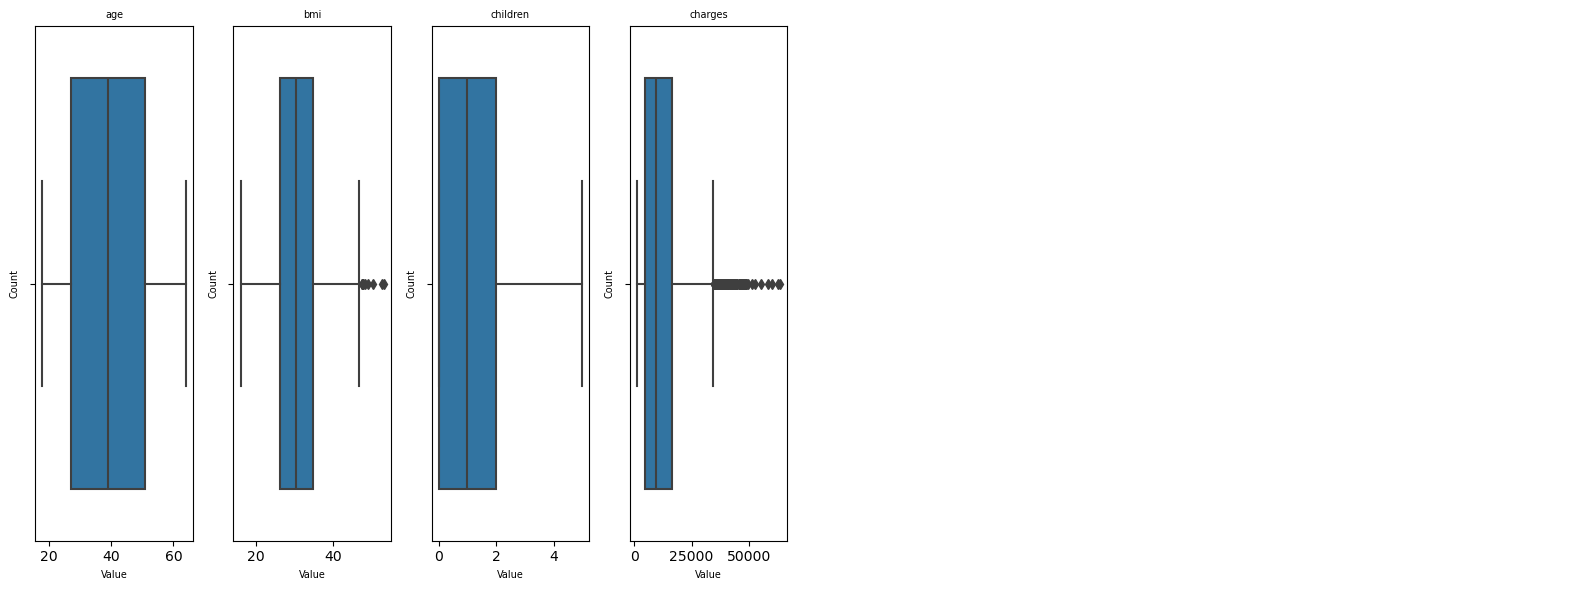

In [7]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

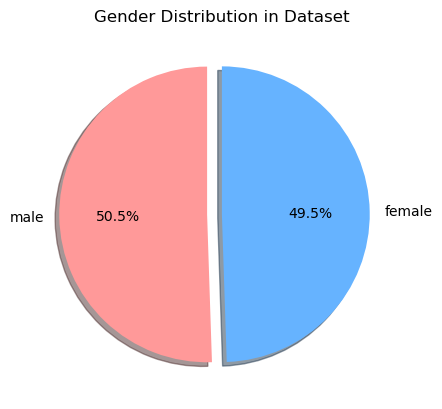

In [8]:
explode = (0.1, 0)  
colors = ['#ff9999', '#66b3ff']  
train['sex'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',  
    startangle=90,  
    colors=colors,  
    explode=explode,  
    shadow=True  
)
plt.ylabel('')  
plt.title('Gender Distribution in Dataset')  
plt.show()

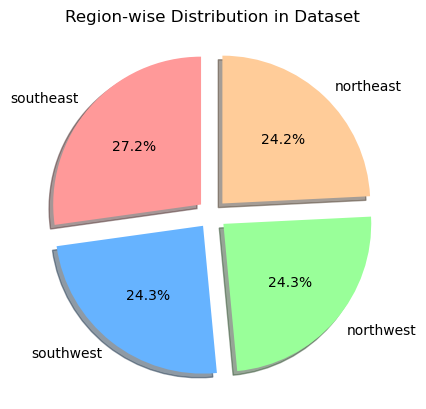

In [9]:
explode = (0.1, 0.1,0.1,0.1)  
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  
train['region'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',  
    startangle=90,  
    colors=colors,  
    explode=explode,  
    shadow=True  
)
plt.ylabel('')  
plt.title('Region-wise Distribution in Dataset')  
plt.show()

## 5) Converting Categorical Variables Into Numerical Variables
<a id="label-encoder"></a>

In [10]:
# CHANGING VALUE OF FEMALE TO 0 & MALE TO 1

In [11]:
train['sex']=train['sex'].map({'female':0,'male':1})
train

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [12]:
# CHANGING VALUE OF YES TO 0 & NO TO 1 IN SMOKER

In [13]:
train['smoker']=train['smoker'].map({'yes':0,'no':1})
train

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,northwest,10600.54830
1334,18,0,31.920,0,1,northeast,2205.98080
1335,18,0,36.850,0,1,southeast,1629.83350
1336,21,0,25.800,0,1,southwest,2007.94500


In [14]:
# CHANGING VALUE OF NE TO 0, NW TO 1, SE TO 2 & SW TO 3 IN REGION

In [15]:
train['region']=train['region'].map({'northeast':0,'northwest':1,'southeast':2,'southwest':3})
train

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,1,0,2205.98080
1335,18,0,36.850,0,1,2,1629.83350
1336,21,0,25.800,0,1,3,2007.94500


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


## 6) Model
<a id="model"></a>


### 6.1) Spliting Data
<a id="building-model"></a>


In [17]:
y = train['charges']

X = train[['age', 'sex', 'bmi',
       'children', 'smoker', 'region']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [18]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,3
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,1
4,32,1,28.880,0,1,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1
1334,18,0,31.920,0,1,0
1335,18,0,36.850,0,1,2
1336,21,0,25.800,0,1,3


In [19]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## 6.2) Calling RandomForestRegressor
<a id="randomforestregressor"></a>


In [20]:
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=77)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

## 6.3) Accuracy test
<a id="accuracy-test"></a>

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape  # Accuracy based on percentage error

# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2714.30
Mean Squared Error (MSE): 26167401.90
Root Mean Squared Error (RMSE): 5115.41
R² Score: 0.8155


## 7) Prediction
<a id="accuracy-test"></a>

In [22]:
import numpy as np
import pandas as pd

print("\n==========================")
print("  Medical Insurance Cost Prediction  ")
print("==========================\n")

a = float(input("Enter Age (18-64) = "))
b = int(input("Enter Sex (Female: 0, Male: 1) = "))
c = float(input("Enter BMI (15-53) = "))
d = int(input("Enter Number of Children (0-5) = "))
e = int(input("Smoker? (Yes: 0, No: 1) = "))

print("\nRegions: ")
print("  0 - Northeast")
print("  1 - Northwest")
print("  2 - Southeast")
print("  3 - Southwest")
f = int(input("Select Region (0-3) = "))

print("\nProcessing your input...\n")
columns = ["age", "sex", "bmi", "children", "smoker", "region"]
features = pd.DataFrame([[a, b, c, d, e, f]], columns=columns)
predicted_cost = rf_regressor.predict(features)[0]  # Extracting the single predicted value
print("===================================")
print(f"🔹 Predicted Cost of Medical Insurance: **${predicted_cost:,.2f}**")
print("===================================\n")



  Medical Insurance Cost Prediction  



Enter Age (18-64) =  50
Enter Sex (Female: 0, Male: 1) =  1
Enter BMI (15-53) =  40
Enter Number of Children (0-5) =  5
Smoker? (Yes: 0, No: 1) =  1



Regions: 
  0 - Northeast
  1 - Northwest
  2 - Southeast
  3 - Southwest


Select Region (0-3) =  2



Processing your input...

🔹 Predicted Cost of Medical Insurance: **$11,403.37**



# -----THANK YOU-----